## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sklearn

In [ ]:
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### Remember to mount the Shared Drive "NLP ML Data" by clicking the Files section to the left and >> Google Drive.

In [ ]:
import os
import codecs

In [ ]:
def read_in(folder):
    files = os.listdir(folder)
    a_dict = {}
    for a_file in sorted(files):
        if not a_file.startswith("."):
            with codecs.open(folder + a_file, encoding='ISO-8859-1', errors ='ignore') as f:
                file_id = a_file.split(".")[0].strip()
                a_dict[file_id] = f.read()
            f.close()
    return a_dict

#### Creating a dictionary pos_dict of postive reviews and their file ID, and likewise for negative IDs.

In [ ]:
folder = "/content/drive/Shareddrives/NLP_ML_Data/review_polarity/txt_sentoken/pos/"
pos_dict = read_in(folder)
#print(len(pos_dict))
#print(pos_dict.get(next(iter(pos_dict))))

In [ ]:
folder = "/content/drive/Shareddrives/NLP_ML_Data/review_polarity/txt_sentoken/neg/"
neg_dict = read_in(folder)
#print(len(neg_dict))
#print(neg_dict.get(next(iter(neg_dict))))

#### Below we calculate some simple statistics, including:

1. Average length of a review in positive and negative subsets
2. Average number of words per sentence
3. Size of the vocabulary (unique words in each subset)
4. Diversity of sentiment vocabulary – average number of times each word occurs in a text with a specific sentiment

In [ ]:
def tokenize(text):
    text.replace("\n", " ")
    return text.split()

def statistics(a_dict):
    length = 0
    sent_length = 0
    num_sents = 0
    vocab = []
    for review in a_dict.values():
        length += len(tokenize(review))
        sents = review.split("\n")
        num_sents += len(sents)
        for sent in sents:
            sent_length += len(tokenize(sent))
        vocab += tokenize(review)
    avg_length = float(length)/len(a_dict)
    avg_sent_length = float(sent_length)/num_sents
    vocab_size = len(set(vocab))
    diversity = float(length)/float(vocab_size)
    return avg_length, avg_sent_length, vocab_size, diversity

categories = ["Positive", "Negative"]
rows = []
rows.append(["Category", "Avg_Len(Review)", "Avg_Len(Sent)", "Vocabulary Size", "Diversity"])
stats = {}
stats["Positive"] = statistics(pos_dict)
stats["Negative"] = statistics(neg_dict)
for cat in categories:
    rows.append([cat, f"{stats.get(cat)[0]:.6f}",
                f"{stats.get(cat)[1]:.6f}",
                f"{stats.get(cat)[2]:.6f}",
                f"{stats.get(cat)[3]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 Category  Avg_Len(Review)  Avg_Len(Sent)  Vocabulary Size  Diversity 
 Positive  807.883721       23.017393      14812.000000     9.381312  
 Negative  705.630000       21.524266      34542.000000     20.428174 


In [ ]:
def vocab_difference(list1, list2):
    vocab1 = []
    vocab2 = []
    for rev in list1:
        vocab1 += tokenize(rev)
    for rev in list2:
        vocab2 += tokenize(rev)
    return sorted(list(set(vocab1) - set(vocab2)))

pos_wordlist = pos_dict.values()
neg_wordlist = neg_dict.values()

print(vocab_difference(pos_wordlist, neg_wordlist)[1500:1600])
print(vocab_difference(neg_wordlist, pos_wordlist)[1500:1600])
print()
print(str(len(vocab_difference(pos_wordlist, neg_wordlist))) + " unique words in positive reviews only")
print(str(len(vocab_difference(neg_wordlist, pos_wordlist))) + " unique words in negative reviews only")

['hindering', 'hinging', 'hinting', 'hippies', 'hit-and-miss', 'hit-list', 'hitchcockian', 'hobbits', 'hoblit', "hoblit's", 'hockney', 'hold-ups', 'holds-barred', 'holidaymakers', 'holiness', 'hollywood-ian', 'hollywoodised', 'homemaker', 'homophobe', 'honored', 'honour', 'hooves', 'hopping', 'horoscopes', 'horrifies', 'horror-fans', 'horror/sci-fi', "horses'", 'hortense', 'hoses', 'hosting', 'hot-blooded', "hot-fudge-rockin'", 'hotpants', 'hound-dog', 'hounding', "hours'", 'howard_', 'hubert', 'hubley', 'hue', 'huerta', 'hughton', 'hulce', 'humbert', 'hummm', 'humours', 'humpalot', "hung's", 'hunger', "hurt's", 'hushes', 'hy', 'hygienists', 'hyman', 'hynek', 'hyper-kinetic', 'hypnotism', 'hypnotized', 'hypocrisy', 'h}', 'ia', 'ians', 'ibsen-esque', 'ice-blue', 'idea--but', 'idealism', 'ideals', 'identifies', 'identikit', 'ideological', 'ideology', "idol's", 'idolized', 'ii_--it', 'ilah', 'illusory', 'imam', 'immeadiate', 'immoral', 'imperious', 'imperiously', 'implication', 'impossibi

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
def lemmatize(sentence, switch):
    text = nlp(sentence.replace("\n", " "))
    if switch=="on":
        lemmas = [text[i].lemma_ for i in range(len(text))]
        return lemmas
    else:
        tokens = [text[i] for i in range(len(text))]
        return tokens

#print out the results and compare
print(lemmatize(pos_dict.get(next(iter(pos_dict))), "on")[:200])
print()
print(lemmatize(pos_dict.get(next(iter(pos_dict))), "off")[:200])

['film', 'adapt', 'from', 'comic', 'book', 'have', 'have', 'plenty', 'of', 'success', ',', 'whether', 'they', 'be', 'about', 'superhero', '(', 'batman', ',', 'superman', ',', 'spawn', ')', ',', 'or', 'gear', 'toward', 'kid', '(', 'casper', ')', 'or', 'the', 'arthouse', 'crowd', '(', 'ghost', 'world', ')', ',', 'but', 'there', 'be', 'never', 'really', 'be', 'a', 'comic', 'book', 'like', 'from', 'hell', 'before', '.', ' ', 'for', 'starter', ',', 'it', 'be', 'create', 'by', 'alan', 'moore', '(', 'and', 'eddie', 'campbell', ')', ',', 'who', 'bring', 'the', 'medium', 'to', 'a', 'whole', 'new', 'level', 'in', 'the', 'mid', "'", '80', 'with', 'a', '12', '-', 'part', 'series', 'call', 'the', 'watchman', '.', ' ', 'to', 'say', 'moore', 'and', 'campbell', 'thoroughly', 'research', 'the', 'subject', 'of', 'jack', 'the', 'ripper', 'would', 'be', 'like', 'say', 'michael', 'jackson', 'be', 'start', 'to', 'look', 'a', 'little', 'odd', '.', ' ', 'the', 'book', '(', 'or', '"', 'graphic', 'novel', ',', 

In [ ]:
def spacy_preprocess_reviews(source):
    source_docs = {}
    index = 0
    for review_id in source.keys():
        #to speed processing up, you can disable "ner" – Named Entity Recognition module of spaCy
        source_docs[review_id] = nlp(source.get(review_id).replace("\n", ""), disable=["ner"])
        if index>0 and (index%200)==0:
            print(str(index) + " reviews processed")
        index += 1
    print("Dataset processed")
    return source_docs

pos_docs = spacy_preprocess_reviews(pos_dict)
neg_docs = spacy_preprocess_reviews(neg_dict)

Dataset processed
200 reviews processed
400 reviews processed
600 reviews processed
800 reviews processed
Dataset processed


In [ ]:
def statistics_lem(source_docs):
    length = 0
    vocab = []
    for review_id in source_docs.keys():
        review_doc = source_docs.get(review_id)
        lemmas = []
        for token in review_doc:
            lemmas.append(token.lemma_)
        length += len(lemmas)
        vocab += lemmas
    avg_length = float(length)/len(source_docs)
    vocab_size = len(set(vocab))
    diversity = float(length)/float(vocab_size)
    return avg_length, vocab_size, diversity

categories = ["Positive", "Negative"]
rows = []
rows.append(["Category", "Avg_Len(Review)", "Vocabulary Size", "Diversity"])
stats = {}
stats["Positive"] = statistics_lem(pos_docs)
stats["Negative"] = statistics_lem(neg_docs)
for cat in categories:
    rows.append([cat, f"{stats.get(cat)[0]:.6f}",
                f"{stats.get(cat)[1]:.6f}",
                f"{stats.get(cat)[2]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 Category  Avg_Len(Review)  Vocabulary Size  Diversity 
 Positive  838.848837       11034.000000     13.076128 
 Negative  737.666000       22746.000000     32.430581 


In [ ]:
def vocab_lem_difference(source_docs1, source_docs2):
    vocab1 = []
    vocab2 = []
    for rev_id in source_docs1.keys():
        rev = source_docs1.get(rev_id)
        for token in rev:
            vocab1.append(token.lemma_)
    for rev_id in source_docs2.keys():
        rev = source_docs2.get(rev_id)
        for token in rev:
            vocab2.append(token.lemma_)
    return sorted(list(set(vocab1) - set(vocab2)))

print(str(len(vocab_lem_difference(pos_docs, neg_docs))) + " unique lemmas in positive reviews only")
print(str(len(vocab_lem_difference(neg_docs, pos_docs))) + " unique lemmas in negative reviews only")

2163 unique lemmas in positive reviews only
13875 unique lemmas in negative reviews only


In [ ]:
def vocab_pos_difference(source_docs1, source_docs2, pos):
    vocab1 = []
    vocab2 = []
    for rev_id in source_docs1.keys():
        rev = source_docs1.get(rev_id)
        for token in rev:
            if token.pos_==pos:
                vocab1.append(token.text)
    for rev_id in source_docs2.keys():
        rev = source_docs2.get(rev_id)
        for token in rev:
            if token.pos_==pos:
                vocab2.append(token.text)
    return sorted(list(set(vocab1) - set(vocab2)))


categories = ["Positive", "Negative"]
rows = []
rows.append(["Category", "Unique adj's", "Unique adv's"])
stats = {}
stats["Positive"] = (len(vocab_pos_difference(pos_docs, neg_docs, "ADJ")),
                     len(vocab_pos_difference(pos_docs, neg_docs, "ADV")))
stats["Negative"] = (len(vocab_pos_difference(neg_docs, pos_docs, "ADJ")),
                     len(vocab_pos_difference(neg_docs, pos_docs, "ADV")))
for cat in categories:
    rows.append([cat, f"{stats.get(cat)[0]:.6f}",
                f"{stats.get(cat)[1]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 Category  Unique adj's  Unique adv's 
 Positive  491.000000    126.000000   
 Negative  3038.000000   827.000000   


## Simple Approach with Sentiment Lexicons

In [ ]:
def collect_wordlist(input_file):
    word_dict = {}
    with codecs.open(input_file, encoding='ISO-8859-1', errors ='ignore') as f:
        for a_line in f.readlines():
            cols = a_line.split("\t")
            if len(cols)>2:
                word = cols[0].strip()
                score = float(cols[1].strip())
                word_dict[word] = score
    f.close()
    return word_dict


adj_90 = collect_wordlist("/content/drive/Shareddrives/NLP_ML_Data/adjectives/1990.tsv")
print(adj_90.get("cool"))
print(len(adj_90))
adj_00 = collect_wordlist("/content/drive/Shareddrives/NLP_ML_Data/adjectives/2000.tsv")
print(adj_00.get("cool"))
print(len(adj_00))
all_90 = collect_wordlist("/content/drive/Shareddrives/NLP_ML_Data/frequent_words/1990.tsv")
print(len(all_90))
all_00 = collect_wordlist("/content/drive/Shareddrives/NLP_ML_Data/frequent_words/2000.tsv")
print(len(all_00))
movie_words = collect_wordlist("/content/drive/Shareddrives/NLP_ML_Data/subreddits/movies.tsv")
print(len(movie_words))

1.28
1968
1.19
2041
4924
4924
4981


In [ ]:
def bin_decisions(a_dict, label, sent_dict):
    decisions = []
    for rev_id in a_dict.keys():
        score = 0
        for token in a_dict.get(rev_id):
            if token.text in sent_dict.keys():
                if sent_dict.get(token.text)<0:
                    score -= 1
                else:
                    score += 1
        if score < 0:
            decisions.append((-1, label))
        else:
            decisions.append((1, label))
    return decisions

def weighted_decisions(a_dict, label, sent_dict):
    decisions = []
    for rev_id in a_dict.keys():
        score = 0
        for token in a_dict.get(rev_id):
            if token.text in sent_dict.keys():
                score += sent_dict.get(token.text)
        if score < 0:
            decisions.append((-1, label))
        else:
            decisions.append((1, label))
    return decisions

def get_accuracy(pos_docs, neg_docs, sent_dict):
    decisions_pos = bin_decisions(pos_docs, 1, sent_dict)
    decisions_neg = bin_decisions(neg_docs, -1, sent_dict)
    decisions_all = decisions_pos + decisions_neg
    lists = [decisions_pos, decisions_neg, decisions_all]
    accuracies = []
    for i in range(0, len(lists)):
        match = 0
        for item in lists[i]:
            if item[0]==item[1]:
                match += 1
        accuracies.append(float(match)/float(len(lists[i])))
    return accuracies


categories = ["Adj_90", "Adj_00", "All_90", "All_00", "Movies"]
rows = []
rows.append(["List", "Acc(positive)", "Acc(negative)", "Acc(all)"])
accs = {}
accs["Adj_90"] = get_accuracy(pos_docs, neg_docs, adj_90)
accs["Adj_00"] = get_accuracy(pos_docs, neg_docs, adj_00)
accs["All_90"] = get_accuracy(pos_docs, neg_docs, all_90)
accs["All_00"] = get_accuracy(pos_docs, neg_docs, all_00)
accs["Movies"] = get_accuracy(pos_docs, neg_docs, movie_words)
for cat in categories:
    rows.append([cat, f"{accs.get(cat)[0]:.6f}",
                f"{accs.get(cat)[1]:.6f}",
                f"{accs.get(cat)[2]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 List    Acc(positive)  Acc(negative)  Acc(all) 
 Adj_90  0.872093       0.267000       0.355802 
 Adj_00  0.825581       0.354000       0.423208 
 All_90  1.000000       0.000000       0.146758 
 All_00  0.930233       0.086000       0.209898 
 Movies  0.017442       0.995000       0.851536 


In [ ]:
def occurrences(a_dict, sent_dict):
    occur = []
    for rev_id in a_dict.keys():
        for token in a_dict.get(rev_id):
            if token.text in sent_dict.keys():
                occur.append(token.text)
    return len(set(occur))

categories = ["Adj_90", "Adj_00", "All_90", "All_00", "Movies"]
rows = []
rows.append(["List", "Occurs(pos)", "Occurs(neg)"])
occs = {}
occs["Adj_90"] = occurrences(pos_docs, adj_90), occurrences(neg_docs, adj_90)
occs["Adj_00"] = occurrences(pos_docs, adj_00), occurrences(neg_docs, adj_00)
occs["All_90"] = occurrences(pos_docs, all_90), occurrences(neg_docs, all_90)
occs["All_00"] = occurrences(pos_docs, all_00), occurrences(neg_docs, all_00)
occs["Movies"] = occurrences(pos_docs, movie_words), occurrences(neg_docs, movie_words)
for cat in categories:
    rows.append([cat, f"{occs.get(cat)[0]:.6f}",
                f"{occs.get(cat)[1]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))


 List    Occurs(pos)  Occurs(neg) 
 Adj_90  1219.000000  1667.000000 
 Adj_00  1260.000000  1731.000000 
 All_90  4048.000000  4712.000000 
 All_00  4073.000000  4732.000000 
 Movies  4129.000000  4659.000000 


## Sentiment Analysis Using SentiWordNet

In [ ]:
from nltk.corpus import sentiwordnet as swn

print(list(swn.senti_synsets('joy')))
print(list(swn.senti_synsets('trouble')))

[SentiSynset('joy.n.01'), SentiSynset('joy.n.02'), SentiSynset('rejoice.v.01'), SentiSynset('gladden.v.01')]
[SentiSynset('trouble.n.01'), SentiSynset('fuss.n.02'), SentiSynset('trouble.n.03'), SentiSynset('trouble.n.04'), SentiSynset('worry.n.02'), SentiSynset('trouble.n.06'), SentiSynset('disturb.v.01'), SentiSynset('trouble.v.02'), SentiSynset('perturb.v.01'), SentiSynset('trouble_oneself.v.01'), SentiSynset('trouble.v.05')]


In [ ]:
joy1 = swn.senti_synset('joy.n.01')
joy2 = swn.senti_synset('joy.n.02')

trouble1 = swn.senti_synset('trouble.n.03')
trouble2 = swn.senti_synset('trouble.n.04')


categories = ["Joy1", "Joy2", "Trouble1", "Trouble2"]
rows = []
rows.append(["List", "Positive score", "Negative Score"])
accs = {}
accs["Joy1"] = [joy1.pos_score(), joy1.neg_score()]
accs["Joy2"] = [joy2.pos_score(), joy2.neg_score()]
accs["Trouble1"] = [trouble1.pos_score(), trouble1.neg_score()]
accs["Trouble2"] = [trouble2.pos_score(), trouble2.neg_score()]
for cat in categories:
    rows.append([cat, f"{accs.get(cat)[0]:.3f}",
                f"{accs.get(cat)[1]:.3f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 List      Positive score  Negative Score 
 Joy1      0.500           0.250          
 Joy2      0.375           0.000          
 Trouble1  0.000           0.625          
 Trouble2  0.000           0.500          


In [ ]:
synsets = swn.senti_synsets('terrific', 'a')
for synset in synsets:
    print("pos: +" + str(synset.pos_score()) + " neg: -" + str(synset.neg_score()))

pos: +0.25 neg: -0.25
pos: +0.75 neg: -0.0
pos: +0.0 neg: -0.625


In [ ]:
from nltk.corpus import wordnet as wn

#use token.tag_ and see https://spacy.io/api/annotation
def convert_tags(pos_tag):
    if pos_tag.startswith("JJ"):
         return wn.ADJ
    elif pos_tag.startswith("NN"):
         return wn.NOUN
    elif pos_tag.startswith("RB"):
         return wn.ADV
    elif pos_tag.startswith("VB") or pos_tag.startswith("MD"):
         return wn.VERB
    return None

def swn_decisions(a_dict, label):
    decisions = []
    for rev_id in a_dict.keys():
        score = 0
        neg_count = 0
        pos_count = 0
        for token in a_dict.get(rev_id):
            wn_tag = convert_tags(token.tag_)
            if wn_tag in (wn.ADJ, wn.ADV, wn.NOUN, wn.VERB):
                synsets = list(swn.senti_synsets(token.lemma_, pos=wn_tag))
                if len(synsets)>0:
                    temp_score = 0.0
                    for synset in synsets:
                        temp_score += synset.pos_score() - synset.neg_score()
                    score += temp_score/len(synsets)
        if score < 0:
            decisions.append((-1, label))
        else:
            decisions.append((1, label))
    return decisions

In [ ]:
def get_swn_accuracy(pos_docs, neg_docs):
    decisions_pos = swn_decisions(pos_docs, 1)
    decisions_neg = swn_decisions(neg_docs, -1)
    decisions_all = decisions_pos + decisions_neg
    lists = [decisions_pos, decisions_neg, decisions_all]
    accuracies = []
    for i in range(0, len(lists)):
        match = 0
        for item in lists[i]:
            if item[0]==item[1]:
                match += 1
        accuracies.append(float(match)/float(len(lists[i])))
    return accuracies


accuracies = get_swn_accuracy(pos_docs, neg_docs)

rows = []
rows.append(["List", "Acc(positive)", "Acc(negative)", "Acc(all)"])
rows.append(["SentiWordNet", f"{accuracies[0]:.6f}",
                f"{accuracies[1]:.6f}",
                f"{accuracies[2]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row))))

 List          Acc(positive)  Acc(negative)  Acc(all) 
 SentiWordNet  0.668605       0.701000       0.696246 


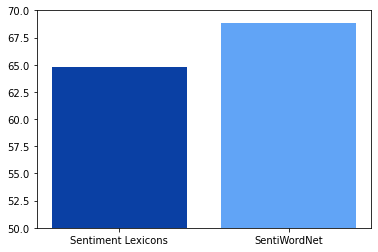

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

a = ["Sentiment Lexicons", "SentiWordNet"]
index = range(len(a))
b = [64.75, 68.80] # Accuracy scores for the compared methods

fig, ax = plt.subplots()
axes = plt.gca()
# Let's set 50 as the lower bound as the majority class baseline is at 50 for this dataset
axes.set_ylim([50,70])

ax.bar(index, b, color=['#0A40A4', '#61A4F6'])
plt.xticks(index, a)

plt.show()

import matplotlib
matplotlib.axes.Axes.plot
matplotlib.pyplot.plot
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend


## Data driven approach with a Decision Tree

In [ ]:
import random
import string
#from spacy.lang.en.stop_words import STOP_WORDS as stopwords_list # stopwords list
punctuation_list = [punct for punct in string.punctuation]

def text_filter(a_dict, label, exclude_lists):
    data = []
    for rev_id in a_dict.keys():
        tokens = []
        for token in a_dict.get(rev_id):
            if not token.text in exclude_lists:
                tokens.append(token.text)
                #tokens.append(token.lemma_) # for the use of lemmas instead of word tokens
        data.append((' '.join(tokens), label))
    return data

def prepare_data(pos_docs, neg_docs, exclude_lists):
    data = text_filter(pos_docs, 1, exclude_lists)
    data += text_filter(neg_docs, -1, exclude_lists)
    random.seed(42)
    random.shuffle(data)
    texts = []
    labels = []
    for item in data:
        texts.append(item[0])
        labels.append(item[1])
    return texts, labels

# for the use of both lists in filtering:
#texts, labels = prepare_data(pos_docs, neg_docs, list(stopwords_list) + punctuation_list)

texts, labels = prepare_data(pos_docs, neg_docs, punctuation_list)

print(len(texts), len(labels))
print(texts[0])

1172 1172
from a major league baseball radio broadcast featuring play by- play man harry canary and color man whitey hashbrown with special guest commentator james berardinelli hc as we go to the top of the 8th we 're joined in the booth by film critic james berardinelli who 's here fresh from seeing the new baseball movie major league back to the minors the third in the popular saga taking a lighter look at the majors nice to see you jim as a big baseball fan and a movie reviewer can you give us the scoop on the new flick jb my opinion the producers should have stopped while they were ahead and that was nine years ago one entry was definitely enough and i 'm surprised there was a third after the anemic showing and low quality of major league 2 this latest installment has all the earmarks of something that should have been released direct to video it 's worse than a mediocre made for tv feature i should also mention that this movie likely wo n't play all that well in cleveland now that

In [ ]:
def split(texts, labels, proportion):
    train_data = []
    train_targets = []
    test_data = []
    test_targets = []
    for i in range(0, len(texts)):
        if i < proportion*len(texts):
            train_data.append(texts[i])
            train_targets.append(labels[i])
        else:
            test_data.append(texts[i])
            test_targets.append(labels[i])
    return train_data, train_targets, test_data, test_targets

train_data, train_targets, test_data, test_targets = split(texts, labels, 0.8)

print(len(train_data)) # 1600?
print(len(train_targets)) # 1600?
print(len(test_data)) # 400?
print(len(test_targets)) # 400?
print(train_targets[:10]) # print out the targets for the first 10 training reviews
print(test_targets[:10]) # print out the targets for the first 10 test reviews

938
938
234
234
[-1, -1, -1, -1, 1, -1, -1, 1, -1, -1]
[-1, -1, -1, 1, 1, -1, -1, -1, 1, -1]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_data)
# Check the dimensionality
print(train_counts.shape)

(938, 28011)


In [ ]:
#print(train_counts[:11])

In [ ]:
#count_vect.get_feature_names()[33682]

In [ ]:
#count_vect.get_feature_names()[30800]

In [ ]:
#print(count_vect.inverse_transform(train_data))

In [ ]:
from sklearn.preprocessing import Binarizer

transformer = Binarizer()
train_bin = transformer.fit_transform(train_counts)
print(train_bin.shape)
print(train_bin[0])

(938, 28011)
  (0, 9862)	1
  (0, 14930)	1
  (0, 14102)	1
  (0, 2148)	1
  (0, 19718)	1
  (0, 3254)	1
  (0, 9039)	1
  (0, 18488)	1
  (0, 3545)	1
  (0, 14982)	1
  (0, 11162)	1
  (0, 3679)	1
  (0, 1113)	1
  (0, 4780)	1
  (0, 27394)	1
  (0, 11178)	1
  (0, 27568)	1
  (0, 23226)	1
  (0, 10849)	1
  (0, 4864)	1
  (0, 13134)	1
  (0, 2449)	1
  (0, 11254)	1
  (0, 1544)	1
  (0, 27188)	1
  :	:
  (0, 676)	1
  (0, 27271)	1
  (0, 9699)	1
  (0, 11482)	1
  (0, 11279)	1
  (0, 26421)	1
  (0, 17213)	1
  (0, 23064)	1
  (0, 11542)	1
  (0, 23063)	1
  (0, 12053)	1
  (0, 15295)	1
  (0, 6338)	1
  (0, 1945)	1
  (0, 14117)	1
  (0, 7556)	1
  (0, 2024)	1
  (0, 17073)	1
  (0, 11859)	1
  (0, 21861)	1
  (0, 805)	1
  (0, 942)	1
  (0, 10808)	1
  (0, 22030)	1
  (0, 1272)	1


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_counts, train_targets)
test_counts = count_vect.transform(test_data)
predicted = clf.predict(test_counts)

for text, label in list(zip(test_data, predicted))[:10]:
    if label==1:
        print('%r => %s' % (text[:100], "pos"))
    else:
        print('%r => %s' % (text[:100], "neg"))

'capsule one of the ten worst movies ever made christopher lambert vs evil ninjas in modern day japan' => neg
'synopsis original jurassic park survivor alan grant neill is tricked by paul and amanda kirby macy a' => neg
'georges polti once wrote a paper called the thirty six dramatic situations in which he asserted the ' => neg
'more than forty years ago the sword and sandals genre of historical epic ruled the box office during' => pos
"no matter what you suspect this is n't your usual action thriller the usual suspects is an intellige" => neg
'the u s army utilizes a number of books known as field manuals which stipulate the specific way in w' => neg
'this film is worth seeing for those who want to see what mick jagger looks like when sporting an abe' => neg
"while watching loser it occurred to me that amy heckerling 's true genius as a film maker is casting" => neg
'note that followups are directed to rec arts movies current films and rec arts movies startrek curre' => neg
"the chara

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

text_clf = Pipeline([('vect', CountVectorizer(min_df=10, max_df=0.5)),
                     ('binarizer', Binarizer()), # include this for detecting presence-absence of features
                     ('clf', MultinomialNB())
                    ])

text_clf.fit(train_data, train_targets)
print(text_clf)
predicted = text_clf.predict(test_data)

Pipeline(steps=[('vect', CountVectorizer(max_df=0.5, min_df=10)),
                ('binarizer', Binarizer()), ('clf', MultinomialNB())])


In [ ]:
from sklearn import metrics

print("\nConfusion matrix:")
print(metrics.confusion_matrix(test_targets, predicted))
print(metrics.classification_report(test_targets, predicted))


Confusion matrix:
[[192  10]
 [ 20  12]]
              precision    recall  f1-score   support

          -1       0.91      0.95      0.93       202
           1       0.55      0.38      0.44        32

    accuracy                           0.87       234
   macro avg       0.73      0.66      0.69       234
weighted avg       0.86      0.87      0.86       234



In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(text_clf, texts, labels, cv=10)
print(scores)
print("Accuracy: " + str(sum(scores)/10))
predicted = cross_val_predict(text_clf, texts, labels, cv=10)
print("\nConfusion matrix:")
print(metrics.confusion_matrix(labels, predicted))
print(metrics.classification_report(labels, predicted))

[0.87288136 0.90677966 0.90598291 0.90598291 0.83760684 0.90598291
 0.8974359  0.90598291 0.84615385 0.87179487]
Accuracy: 0.8856584093872231

Confusion matrix:
[[960  40]
 [ 94  78]]
              precision    recall  f1-score   support

          -1       0.91      0.96      0.93      1000
           1       0.66      0.45      0.54       172

    accuracy                           0.89      1172
   macro avg       0.79      0.71      0.74      1172
weighted avg       0.87      0.89      0.88      1172



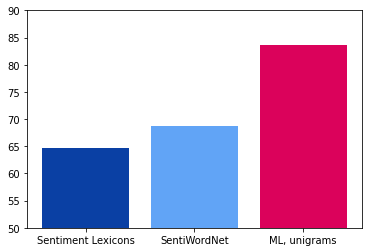

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

a = ["Sentiment Lexicons", "SentiWordNet", "ML, unigrams"]
index = range(len(a))
b = [64.75, 68.80, 83.60] # Accuracy scores for the compared methods

fig, ax = plt.subplots()
axes = plt.gca()
# Let's set 50 as the lower bound as the majority class baseline is at 50 for this dataset
axes.set_ylim([50,90])

ax.bar(index, b, color=['#0A40A4', '#61A4F6', '#DB025B'])
plt.xticks(index, a)

plt.show()

import matplotlib
matplotlib.axes.Axes.plot
matplotlib.pyplot.plot
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 3))),
                     ('binarizer', Binarizer()), #presence-absence of features
                     ('clf', MultinomialNB())
                    ])

text_clf.fit(train_data, train_targets)
print(text_clf)
predicted = text_clf.predict(test_data)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('binarizer', Binarizer()), ('clf', MultinomialNB())])


In [ ]:
print("\nConfusion matrix:")
print(metrics.confusion_matrix(test_targets, predicted))
print(metrics.classification_report(test_targets, predicted))


Confusion matrix:
[[202   0]
 [ 32   0]]
              precision    recall  f1-score   support

          -1       0.86      1.00      0.93       202
           1       0.00      0.00      0.00        32

    accuracy                           0.86       234
   macro avg       0.43      0.50      0.46       234
weighted avg       0.75      0.86      0.80       234



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scores = cross_val_score(text_clf, texts, labels, cv=10)
print(scores)
print("Accuracy: " + str(sum(scores)/10))
predicted = cross_val_predict(text_clf, texts, labels, cv=10)
print("\nConfusion matrix:")
print(metrics.confusion_matrix(labels, predicted))
print(metrics.classification_report(labels, predicted))

[0.84745763 0.84745763 0.85470085 0.85470085 0.85470085 0.85470085
 0.85470085 0.85470085 0.85470085 0.85470085]
Accuracy: 0.8532522091844124

Confusion matrix:
[[1000    0]
 [ 172    0]]
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92      1000
           1       0.00      0.00      0.00       172

    accuracy                           0.85      1172
   macro avg       0.43      0.50      0.46      1172
weighted avg       0.73      0.85      0.79      1172



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


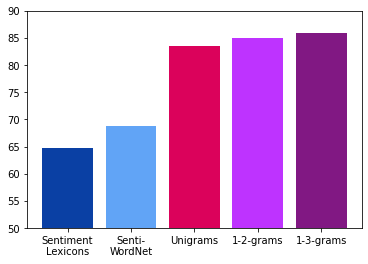

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

a = ["Sentiment\nLexicons", "Senti-\nWordNet", "Unigrams", "1-2-grams", "1-3-grams"]
index = range(len(a))
b = [64.75, 68.80, 83.60, 85.05, 85.90] # Accuracy scores for the compared methods

fig, ax = plt.subplots()
axes = plt.gca()
# Let's set 50 as the lower bound as the majority class baseline is at 50 for this dataset
axes.set_ylim([50,90])

ax.bar(index, b, color=['#0A40A4', '#61A4F6', '#DB025B', '#BE33FF', '#811883'])
plt.xticks(index, a)

plt.show()

import matplotlib
matplotlib.axes.Axes.plot
matplotlib.pyplot.plot
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend

#Comparison with additional classifier techniques
Now, we will compate the decision tree approach outlined above with a Multinomial Naive Bayes, Logistic Regression and Linear Support Vector Classifier.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
classifiers = [
    MultinomialNB(),
    LogisticRegression(),
    LinearSVC()
]

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

In [ ]:
# Test each classifier using 10-fold cross-validation
results = []
for clf in classifiers:
    scores = cross_val_score(clf, X_train, train_targets, cv=10)
    results.append(scores.mean()*100)
    clf.fit(X_train, train_targets)
    test_score = clf.score(X_test, test_targets)
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Training Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"Test Accuracy: {test_score:.4f}\n")

Classifier: MultinomialNB
Training Accuracy: 0.8507 (+/- 0.0013)
Test Accuracy: 0.8632

Classifier: LogisticRegression
Training Accuracy: 0.8507 (+/- 0.0013)
Test Accuracy: 0.8632

Classifier: LinearSVC
Training Accuracy: 0.8614 (+/- 0.0169)
Test Accuracy: 0.8803



In [ ]:
b = [64.75, 68.80, 83.60, 85.05, 85.90]
for value in b:
  results.append(value)

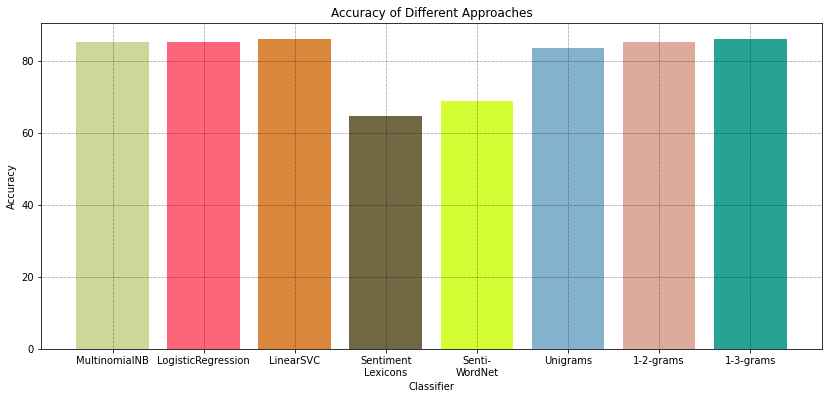

In [ ]:
# Plot the results
colors = np.random.rand(len(results), 3)

x_labels = ['MultinomialNB', 'LogisticRegression', 'LinearSVC','Sentiment\nLexicons','Senti-\nWordNet', 'Unigrams', '1-2-grams', '1-3-grams']
y_values = [results]
fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x_labels, results, color=colors)
ax.grid(True, linestyle=':', linewidth='0.5', color='black',which='both')
ax.set_title('Accuracy of Different Approaches')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
plt.show()


## Testing Keras
Building an NLP model with Keras.

In [ ]:
from keras.utils import to_categorical

# Split the data into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Define the vectorizer
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')

# Fit and transform the training data
train_features = vectorizer.fit_transform(train_data)

# Transform the testing data
test_features = vectorizer.transform(test_data)

# Define the classifiers to test
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=5000),
    "LinearSVC": LinearSVC(max_iter=5000),
    "NeuralNetwork": Sequential([
        Dense(64, activation='relu', input_shape=(train_features.shape[1],)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
}

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

# Convert the text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

# Pad the sequences to a fixed length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Convert the target data to binary labels
train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(max_length,)),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_targets, validation_data=(test_data, test_targets), epochs=5, batch_size=64)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data, test_targets)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/5
15/15 [==============================] - 2s 24ms/step - loss: 168.2698 - accuracy: 0.8762 - val_loss: 1.6446 - val_accuracy: 1.0000
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 3.1365 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.1204 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 0s 9ms/step - loss: 0.5206 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0000
